# 1. Linear Regression and Diagnostics

In [6]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import load_boston

%matplotlib inline

In [7]:
data = load_boston()

print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
# Display the dictionary keys

data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
# Forming Response and Explanatory Variables

X = data['data']
header = data['feature_names']

Y = data['target']
Y = Y.reshape(-1,1)

### Convert the data into DataFrame and explore

In [10]:
df = pd.DataFrame(np.append(X,Y,axis=1))
df.columns = list(header) + ['PRICE']

df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [12]:
# Descriptive statistics of each column

np.round(df.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [13]:
# Pair-wise Correlation matrix

np.round(df.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


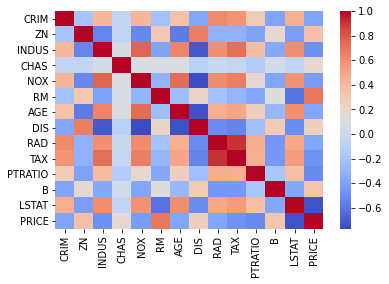

In [14]:
# Visualizing Correlation Matrix

sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

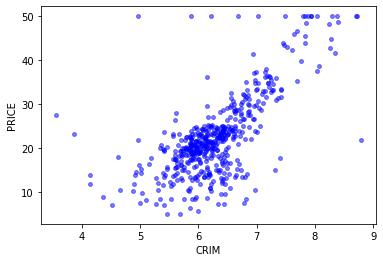

In [15]:
# Visualize CRIM vs PRICE
# X[:,5] , we selected all the data of 5th column from X (CRIM)
# Y[:,0] , we selected all the data of 1st column from Y (PRICE)

plt.scatter(X[:,5],Y[:,0],c = 'b',s=15,alpha=0.5)
plt.xlabel('CRIM')
plt.ylabel('PRICE')
plt.show()

### Train by Linear Regression

In [16]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X,Y)

LinearRegression()

In [17]:
lm.intercept_

array([36.45948839])

In [18]:
# Rest of coefficients
# (Parameters)

lm.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [19]:
# Display parameters as a DataFrame
# You can compare this dataframe from above rest of coefficients

parametersDF = pd.DataFrame(lm.coef_,index=['Parameter Value (Coeff)'],columns = header)
parametersDF['intercept'] = lm.intercept_[0]
parametersDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,intercept
Parameter Value (Coeff),-0.108011,0.04642,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758,36.459488


### Daignostics

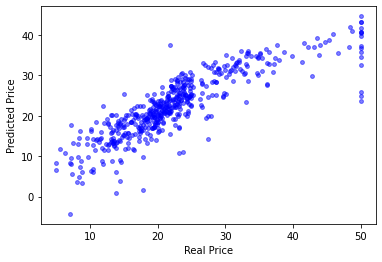

In [20]:
# In-Sample Prediction - means to say that model will use data for prediction on which it is trained

predY = lm.predict(X)

plt.scatter(Y,predY,c='b',s=15,alpha=0.5)
plt.xlabel('Real Price')
plt.ylabel("Predicted Price")
plt.show()

In [21]:
# Correlation between Real Price and Predicted Price

pd.Series(Y[:,0]).corr(pd.Series(predY[:,0]))

0.8606059865637752

In [22]:
# Coefficient of Determination R^2

lm.score(X,Y)

0.7406426641094095

### In-sample and out-of-sample Testing

In [23]:
# Split the data set

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state = 123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [24]:
lm = LinearRegression()
lm.fit(x_train,y_train)

predY_in = lm.predict(x_train)
predY_out = lm.predict(x_test)

In [25]:
print('In-sample MSE is      : ' + str(metrics.mean_squared_error(y_train, predY_in)))
print('Out-of-sample MSE is  : ' + str(metrics.mean_squared_error(y_test, predY_out)))
print('-'*50)
print('In-sample RMSE is     : ' + str(np.sqrt(metrics.mean_squared_error(y_train, predY_in))))
print('Out-of-sample RMSE is : ' + str(np.sqrt(metrics.mean_squared_error(y_test, predY_out))))

# it means that we are not getting results as much accurate because we got error in out of sample prediction a bit larger.

In-sample MSE is      : 20.184336639873155
Out-of-sample MSE is  : 28.40585481050824
--------------------------------------------------
In-sample RMSE is     : 4.492698146979514
Out-of-sample RMSE is : 5.329714327288869


### Residual Analysis

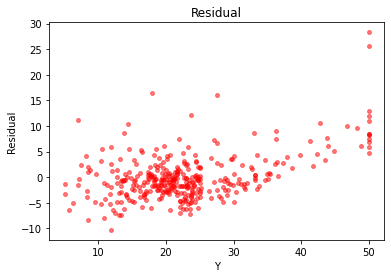

In [26]:
# Calculate Residual

residual = y_train - predY_in

# Visually mean = 0, variance = constant
plt.scatter(y_train,residual,c='r',s=15,alpha=0.5)
plt.xlabel('Y')
plt.ylabel('Residual')
plt.title('Residual')
plt.show()

D:\Users\iqbal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


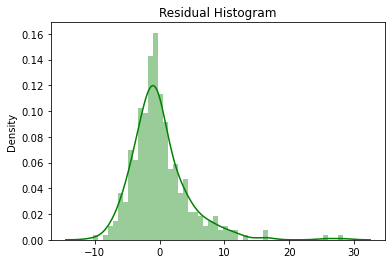

In [27]:
# Residuals normally distributed centerred around 0

sns.distplot(residual, bins=50, color='g').set_title('Residual Histogram')
plt.show()

#### Example:  Given a new set of values for the explanatory variables, predict the response:  
- CRIM     : 0.03
- ZN       : 0.0
- INDUS    : 13.0
- CHAS     : 0.0
- NOX      : 0.4
- RM       : 4.3
- AGE      : 23.5
- DIS      : 1.9
- RAD      : 1.0
- TAX      : 273.0
- PTRATIO  : 18.0 
- B        : 380.0
- LSTAT    : 7.5

In [30]:
x_new = np.array([0.03,0.0,13.0,0.0,0.4,4.3,23.5,1.9,1.0,273.0,18.0,380.0,7.5]).reshape(1,-1)
y_pred_new = lm.predict(x_new)
print(np.round(y_pred_new[0,0],3))

20.594


            _____________________________________________________________________________________________________

# 2. Linear regression diagnostics and modeling using StatsModels library

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics

%matplotlib inline

###### Load Data and convert it into DataFrame

In [49]:
data = load_boston()

x = data.data
header = data.feature_names

y = data.target
y = y.reshape(-1,1)

df = pd.DataFrame(np.append(x,y,axis=1))
df.columns = list(header) + ['PRICE']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###### Linear Model using R styled Formula

In [51]:
# Using all the explanatory variables

model1 = smf.ols(formula="PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT ",data = df)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          6.72e-135
Time:                        13:08:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note : INDUS and AGE do not seem to be significant. Adjusted $R^2 = 0.734$ and $AIC = 3026$.**

In [53]:
# Dropping the explanatory variables 'INDUS' and 'AGE'

model2 = smf.ols(formula = "PRICE ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT ",data = df)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          5.54e-137
Time:                        13:13:09   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note : All the explanatory variables are significant. Adjusted $R^2 = 0.735$ and $AIC = 3022$.**

**The second model is slightly optimized compared to the first one.**

            _____________________________________________________________________________________________________

# 3. Linear Regression Prediction and Confidence Interval Level

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [57]:
# (Explanatory Variable) 'study' contains the hours of study
# (Response Variable) 'score' contains the test scores

study = np.array([ 3, 4.5, 6, 1.2, 2, 6.9, 6.7, 5.5])
score = np.array([ 88, 85, 90, 80, 81, 92, 95, 90])
n = study.size

lm = LinearRegression()

lm.fit(study.reshape(-1,1),score.reshape(-1,1))

b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]

print(b0)
print(b1)

77.68466977583873
2.2213028433879947


In [58]:
# Calculate in-sample RMSE

predScore = lm.predict(study.reshape(-1,1))
mse = metrics.mean_squared_error(score,predScore)
rmse = np.sqrt(mse)
np.round(rmse,2)

1.93

###### Confidence Interval and Visualization

In [61]:
# Defining function which will calculate Standard Error

def StdError(x_star, x_vec, mse, n):
    x_mean = np.mean(x_vec)
    return (np.sqrt(mse*(1/n+(x_star - x_mean)**2/np.sum((x_vec-x_mean)**2))))

In [62]:
# y_hat : predicted y
# y_low : lower bound of confidence intervl (95%)
# y_up : upper bound of confidence interval (95%)

x_star = np.linspace(1,9,10)
y_hat = b0 + b1*x_star
y_low = y_hat - st.t.ppf(0.975,n-2) * StdError(x_star,study,mse,n)
y_up = y_hat + st.t.ppf(0.975,n-2) * StdError(x_star,study,mse,n)

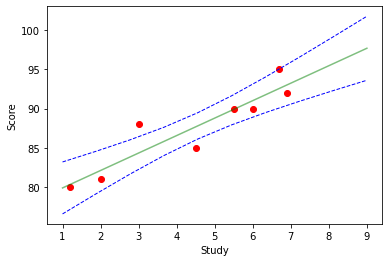

In [63]:
# Now , display

plt.scatter(study, score, c='red')
plt.plot(x_star, y_low, c='blue', linestyle = '--', linewidth=1)
plt.plot(x_star, y_hat, c='green', linewidth = 1.5, alpha=0.5)
plt.plot(x_star, y_up, c='blue', linestyle = '--', linewidth=1)
plt.xlabel('Study')
plt.ylabel('Score')
plt.show()

            _____________________________________________________________________________________________________

# 4. Dummy Variables and interaction

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [66]:
df = pd.read_csv('data_studentlist.csv',header='infer', encoding='latin1')
df.head(5)

# we will use 3 variables. (height, weight, gender)

,Name,Gender,Age,Grade,Absence,Bloodtype,Height,Weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


### Linear Regression without Dummy Variable
<br>
The formula is: weight ~ height

In [94]:
# Do the regression as usual

lm = LinearRegression()
x = df.Height.values.reshape(-1,1)
y = df.Weight.values.reshape(-1,1)

lm.fit(x,y)

b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
rsq1 = lm.score(x,y)
rmse1 = np.sqrt(metrics.mean_squared_error(y,lm.predict(x)))

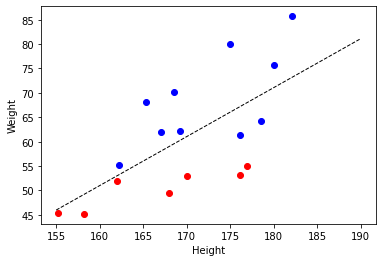

In [95]:
# Visualize

df_m = df[df.Gender == 'M']
df_f = df[df.Gender == 'F']

x_grid = np.linspace(155,190,10)

plt.scatter(x=df_m.Height, y=df_m.Weight, color='blue')
plt.scatter(x=df_f.Height, y=df_f.Weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--', linewidth=1, color='black')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Linear Regression with Dummy Variable
<br>
The formula is: weight ~ height + gender

In [96]:
# Create a dummy variable for 'gender'
gender_dummy = pd.get_dummies(df.Gender, drop_first=True, prefix="Gender")
x = df[['Height']].join(gender_dummy)
y = df[['Weight']]

# Do regression as usual
lm.fit(x,y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
rsq2 = lm.score(x,y)
rmse2 = np.sqrt(metrics.mean_squared_error(y, lm.predict(x)))

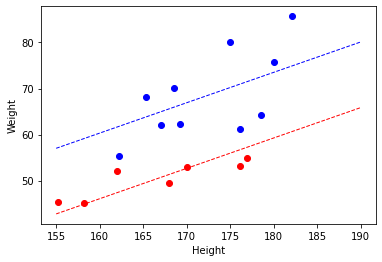

In [97]:
# Visualize

df_m = df[df.Gender=='M']
df_f = df[df.Gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.Height, y=df_m.Weight, color='blue')
plt.scatter(x=df_f.Height, y=df_f.Weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + b1*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Linear regression with dummy variable that interacts:
<br>
The formula is: weight ~ height + gender + height $\times$ gender

In [98]:
# Create a dummy variable for 'gender':

gender_dummy = pd.get_dummies(df.Gender, drop_first=True, prefix='gender')
X = df[['Height']].join(gender_dummy)
Y = df[['Weight']]

In [99]:
# Create the interaction term. 

X['Height x gender_M'] = X['Height']*X['gender_M']
X.head(5)

,Height,gender_M,Height x gender_M
0,165.3,1,165.3
1,170.1,0,0.0
2,175.0,1,175.0
3,182.1,1,182.1
4,168.0,0,0.0


In [100]:
# Do the regression as usual.

lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
b3 = lm.coef_[0][2]
rsq3 = lm.score(X,Y)
rmse3 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

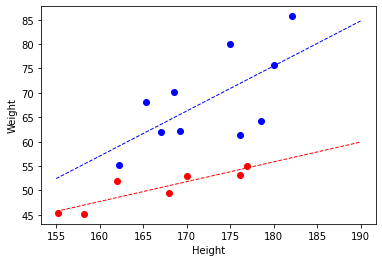

In [101]:
# Visualize.
# Distinguish the regression lines by gender.

df_m = df[df.Gender=='M']
df_f = df[df.Gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.Height, y=df_m.Weight, color='blue')
plt.scatter(x=df_f.Height, y=df_f.Weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + (b1+b3)*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Compare $R^2$, RMSE for the different cases:

In [102]:
np.round([rsq1,rsq2,rsq3],3)


array([0.441, 0.762, 0.787])

In [107]:
np.round([rmse1,rmse2,rmse3],3)

array([8.595, 5.613, 5.307])

NOTE: With a dummy variable that interacts, the $R^2$ is the highest and the *RMSE* is the lowest. 

            _____________________________________________________________________________________________________

# 5. Regularized Regressions
### Ridge and Lasso Regressions (L1 and L2)

In [109]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

###### Read Data

In [112]:
data = pd.read_csv('mtcars.csv',header='infer')

data.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [113]:
x = data.drop(columns=['model','mpg'])
y = data.mpg

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)

## Ridge Regression

In [118]:
lambdaRange = range(1,100)

In [121]:
bestRsq = 0.0                           # To contain best R^2
bestLambda = 0.0                        # To conatin best lambda

for aLambda in lambdaRange:        
    ridge = Ridge(aLambda)              
    ridge.fit(x_train, y_train)         # train the training set
    rsq = ridge.score(x_test, y_test)   # calculate R^2 with testing set
    
    if(rsq > bestRsq):                  # id R^2 is better, replace bestRsq
        bestRsq = rsq
        bestLambda = aLambda
        print("Lambda = ", bestLambda," and R^2 = ", np.round(rsq,3))
    
ridge = Ridge(bestLambda)               # Final run with bestLambda
ridge.fit(x,y)

Lambda =  1  and R^2 =  0.779
Lambda =  2  and R^2 =  0.813
Lambda =  3  and R^2 =  0.822
Lambda =  4  and R^2 =  0.825
Lambda =  5  and R^2 =  0.825


Ridge(alpha=5)

In [122]:
# Show the intercept

ridge.intercept_

28.58776326642279

In [127]:
# Show other coefficients
# In Ridge, even when lamda is large no parameter is exatly 0.

ridge.coef_

array([-0.51185256, -0.00768344, -0.01533332,  0.61667067, -1.39209019,
       -0.00709397,  0.11850925,  0.94390866,  0.71148287, -0.7038523 ])

## Lasso Regression

In [128]:
lambdaRange = range(1,100)

In [130]:
bestRsq = 0.0                                                # To contain the best R^2.
bestLambda = 0.0                                             # To contain the best lambda.

for aLambda in lambdaRange:
    lasso = Lasso(aLambda)
    lasso.fit(x_train,y_train)                               # Train with the training set.
    rsq = lasso.score(x_test,y_test)                         # Calculate R^2 with the testing set. 
    
    if (rsq > bestRsq):                                      # If R^2 is better, replace bestRsq.
        bestRsq = rsq
        bestLambda = aLambda
        print("Lambda = ", bestLambda, " and  R^2 = ", np.round(rsq,3))
lasso = Lasso(bestLambda)                                    # Final run with the bestLambda.
lasso.fit(x,y) 

Lambda =  1  and  R^2 =  0.735
Lambda =  2  and  R^2 =  0.743
Lambda =  3  and  R^2 =  0.744
Lambda =  4  and  R^2 =  0.744
Lambda =  5  and  R^2 =  0.744
Lambda =  6  and  R^2 =  0.745
Lambda =  7  and  R^2 =  0.745
Lambda =  8  and  R^2 =  0.745
Lambda =  9  and  R^2 =  0.746
Lambda =  10  and  R^2 =  0.746
Lambda =  11  and  R^2 =  0.746
Lambda =  12  and  R^2 =  0.747
Lambda =  13  and  R^2 =  0.747
Lambda =  14  and  R^2 =  0.747
Lambda =  15  and  R^2 =  0.747
Lambda =  16  and  R^2 =  0.747
Lambda =  17  and  R^2 =  0.748
Lambda =  18  and  R^2 =  0.748
Lambda =  19  and  R^2 =  0.748
Lambda =  20  and  R^2 =  0.748
Lambda =  21  and  R^2 =  0.749
Lambda =  22  and  R^2 =  0.749
Lambda =  23  and  R^2 =  0.749
Lambda =  24  and  R^2 =  0.749
Lambda =  25  and  R^2 =  0.749
Lambda =  26  and  R^2 =  0.749
Lambda =  27  and  R^2 =  0.749
Lambda =  28  and  R^2 =  0.75
Lambda =  29  and  R^2 =  0.75
Lambda =  30  and  R^2 =  0.75
Lambda =  31  and  R^2 =  0.75
Lambda =  32  and  R^

Lasso(alpha=41)

In [131]:
# Show the intercept
lasso.intercept_

29.481705776221872

In [133]:
# Show other parameters
# Lasso can make some paramters exactly 0 when lambda is large enough.

lasso.coef_

array([-0.       , -0.0335117, -0.0113111,  0.       , -0.       ,
        0.       ,  0.       ,  0.       ,  0.       , -0.       ])